# Introduction

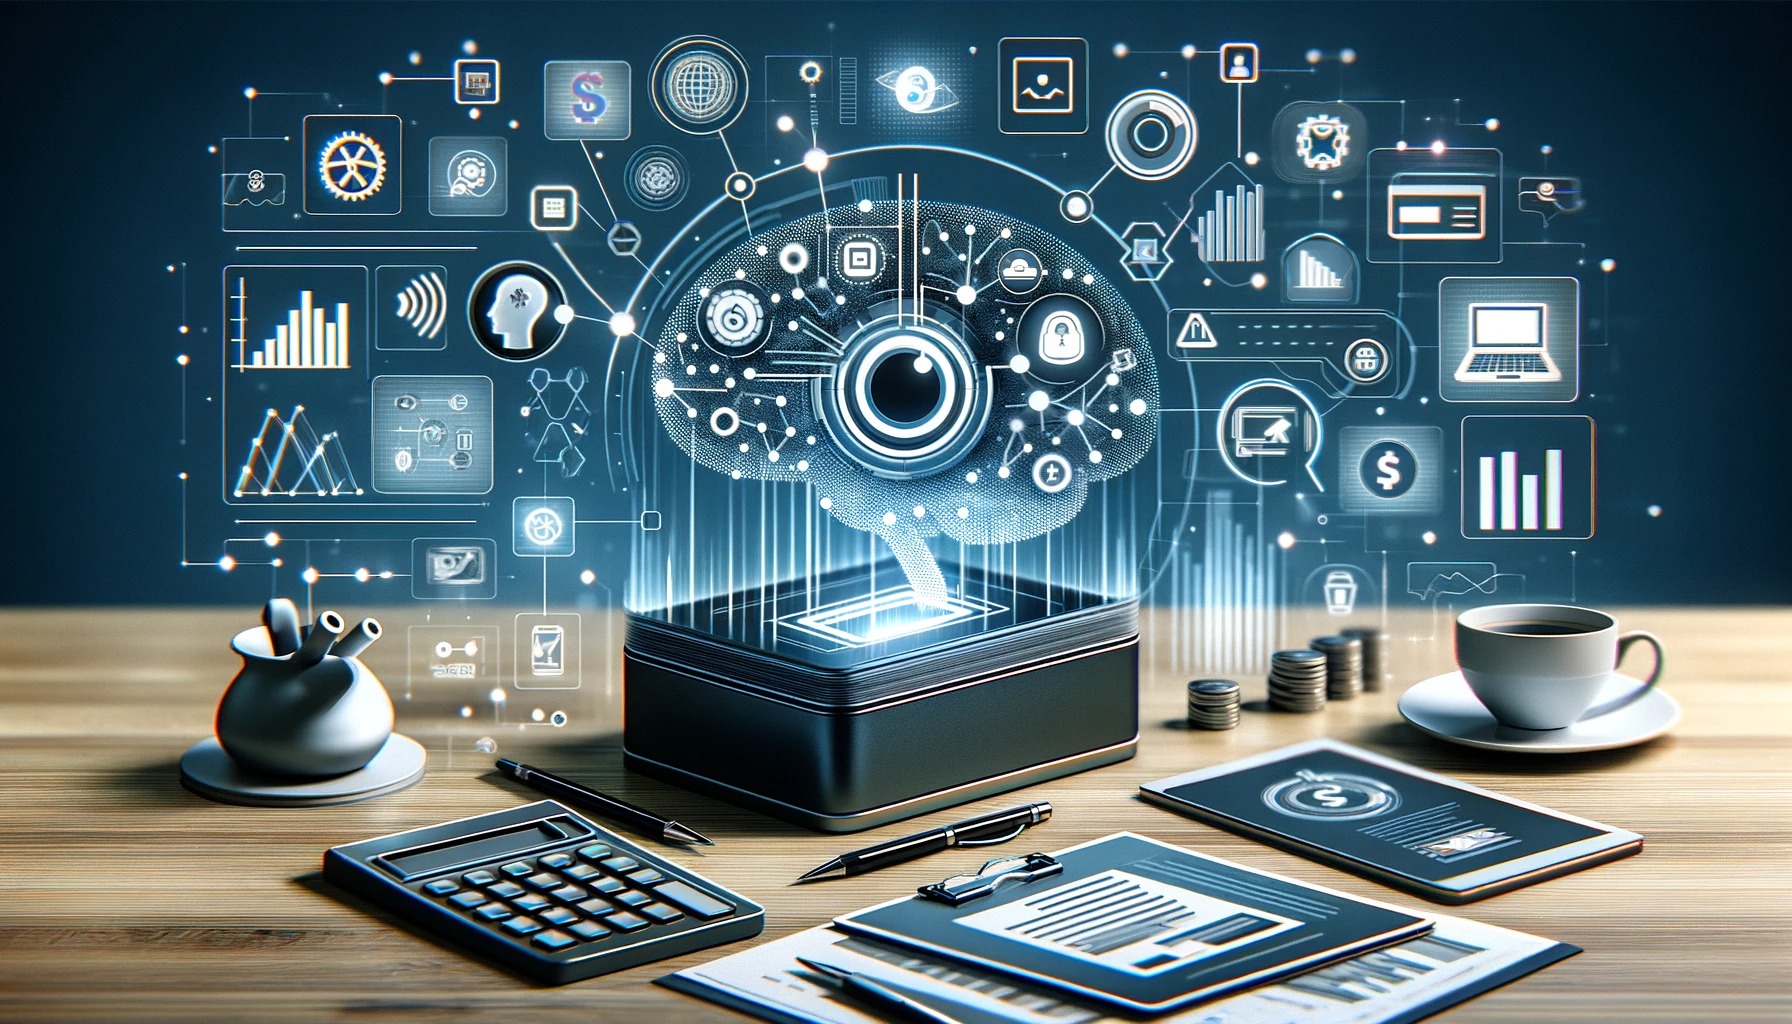

**Context**

You and your friend came up with a brilliant startup idea - provide **risk evaluation as a service for retail banks**. As with most successful startup teams, both of you have your specialty. Your friend is responsible for sales and operations, while you are responsible for everything product-related, from planning to data analysis to building the solution. You have quickly identified that machine learning will be an essential part of your offering because you believe that the models can capture statistical patterns in the defaults on bank loans. You decide to start your investigation by downloading this dataset from Home Credit Group. You are not yet sure, what is the most crucial problem for your potential clients, so you had a meeting with your friend to discuss how your proof-of-concept (POC) product should look like. After a lot of arguing, you both agreed to create a number of different models so that you have a robust and diversified offering when you get your first meeting with the potential clients. You are eager to investigate the dataset and see what you can predict, so you propose that you come up with interesting features to analyze and predict - this way, you'll focus on building a solid offering, and she can work on getting meetings with the banks.

**Objectives**
- Practice translating business requirements into data science tasks.
- Practice performing EDA.
- Practice applying statistical inference procedures.
- Practice using machine learning to solve business problems.
- Practice deploying multiple machine learning models.

**Requirements**
- Download the data and the data description.
- Create a plan for your investigation, analysis, and POC building. This should include your assumptions, overall objectives, and objectives for each step in your plan. You are not expected to have a plan for the whole project but instead have a clear understanding of what you'll try to achieve in the next step and build the plan one step at a time.
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
- Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, conducting z or t-tests for these hypotheses.
- Use machine learning models to predict the target variables based on your proposed plan. You should use hyperparameter tuning, model ensembling, the analysis of model selection, and other methods. The decision of where to use and not to use these techniques is up to you; however, they should be aligned with your team's objectives.
- Deploy these machine learning models to Google Cloud Platform. You are free to choose any deployment option you wish as long as it can be called an HTTP request.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results you got, and what these results mean.
- Provide suggestions about how your analysis and models can be improved.

**Plan**

1. Analyze the raw data and inform the potential clients about accessible features that can be used for predictions. Result: data structured and presented.
2. Explore some of the features that would inform the clients about the likely portrait of a normal and problematic costumers. Result: data structured and presented.
3. Create a model (Model 1) that would help bank quickly (having limited data) evaluate customers' creditworthiness. Result: model that is better than random guessing.
4. Deploy the model (Model 1) to the cloud. Result: model that is accessible via HTTP requests.
5. Make model practical to use and capable of live demo. Result: Model is accessible via simple user interface so that bank employees can quickly evaluate weather client is worth further considerations for the loan.
6. Create a more complex model (Model 2) that may be used after initial filtering (Model 1), or instead of it. This model should be further developed if the bank is interested in my services. Result: model encompassing more data then Model 1 and utilizing at least one bonus challenge.

# Package import

In [1]:
import pandas as pd
import numpy as np

import glob
import os

%load_ext nb_black
%config InlineBackend.figure_format = 'svg'

<IPython.core.display.Javascript object>

# Data overview

In [2]:
path = "/Users/drkazimieras/Turing College/Home credit default risk/data files/*.csv"
data_files = [os.path.basename(file) for file in glob.glob(path)]
data_files

['application_test.csv',
 'HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'application_train.csv',
 'bureau.csv',
 'previous_application.csv',
 'bureau_balance.csv',
 'sample_submission.csv']

<IPython.core.display.Javascript object>

There are 10 .csv files containing the relevant information for this project. The relation between all of these files is provided in a scheme below.

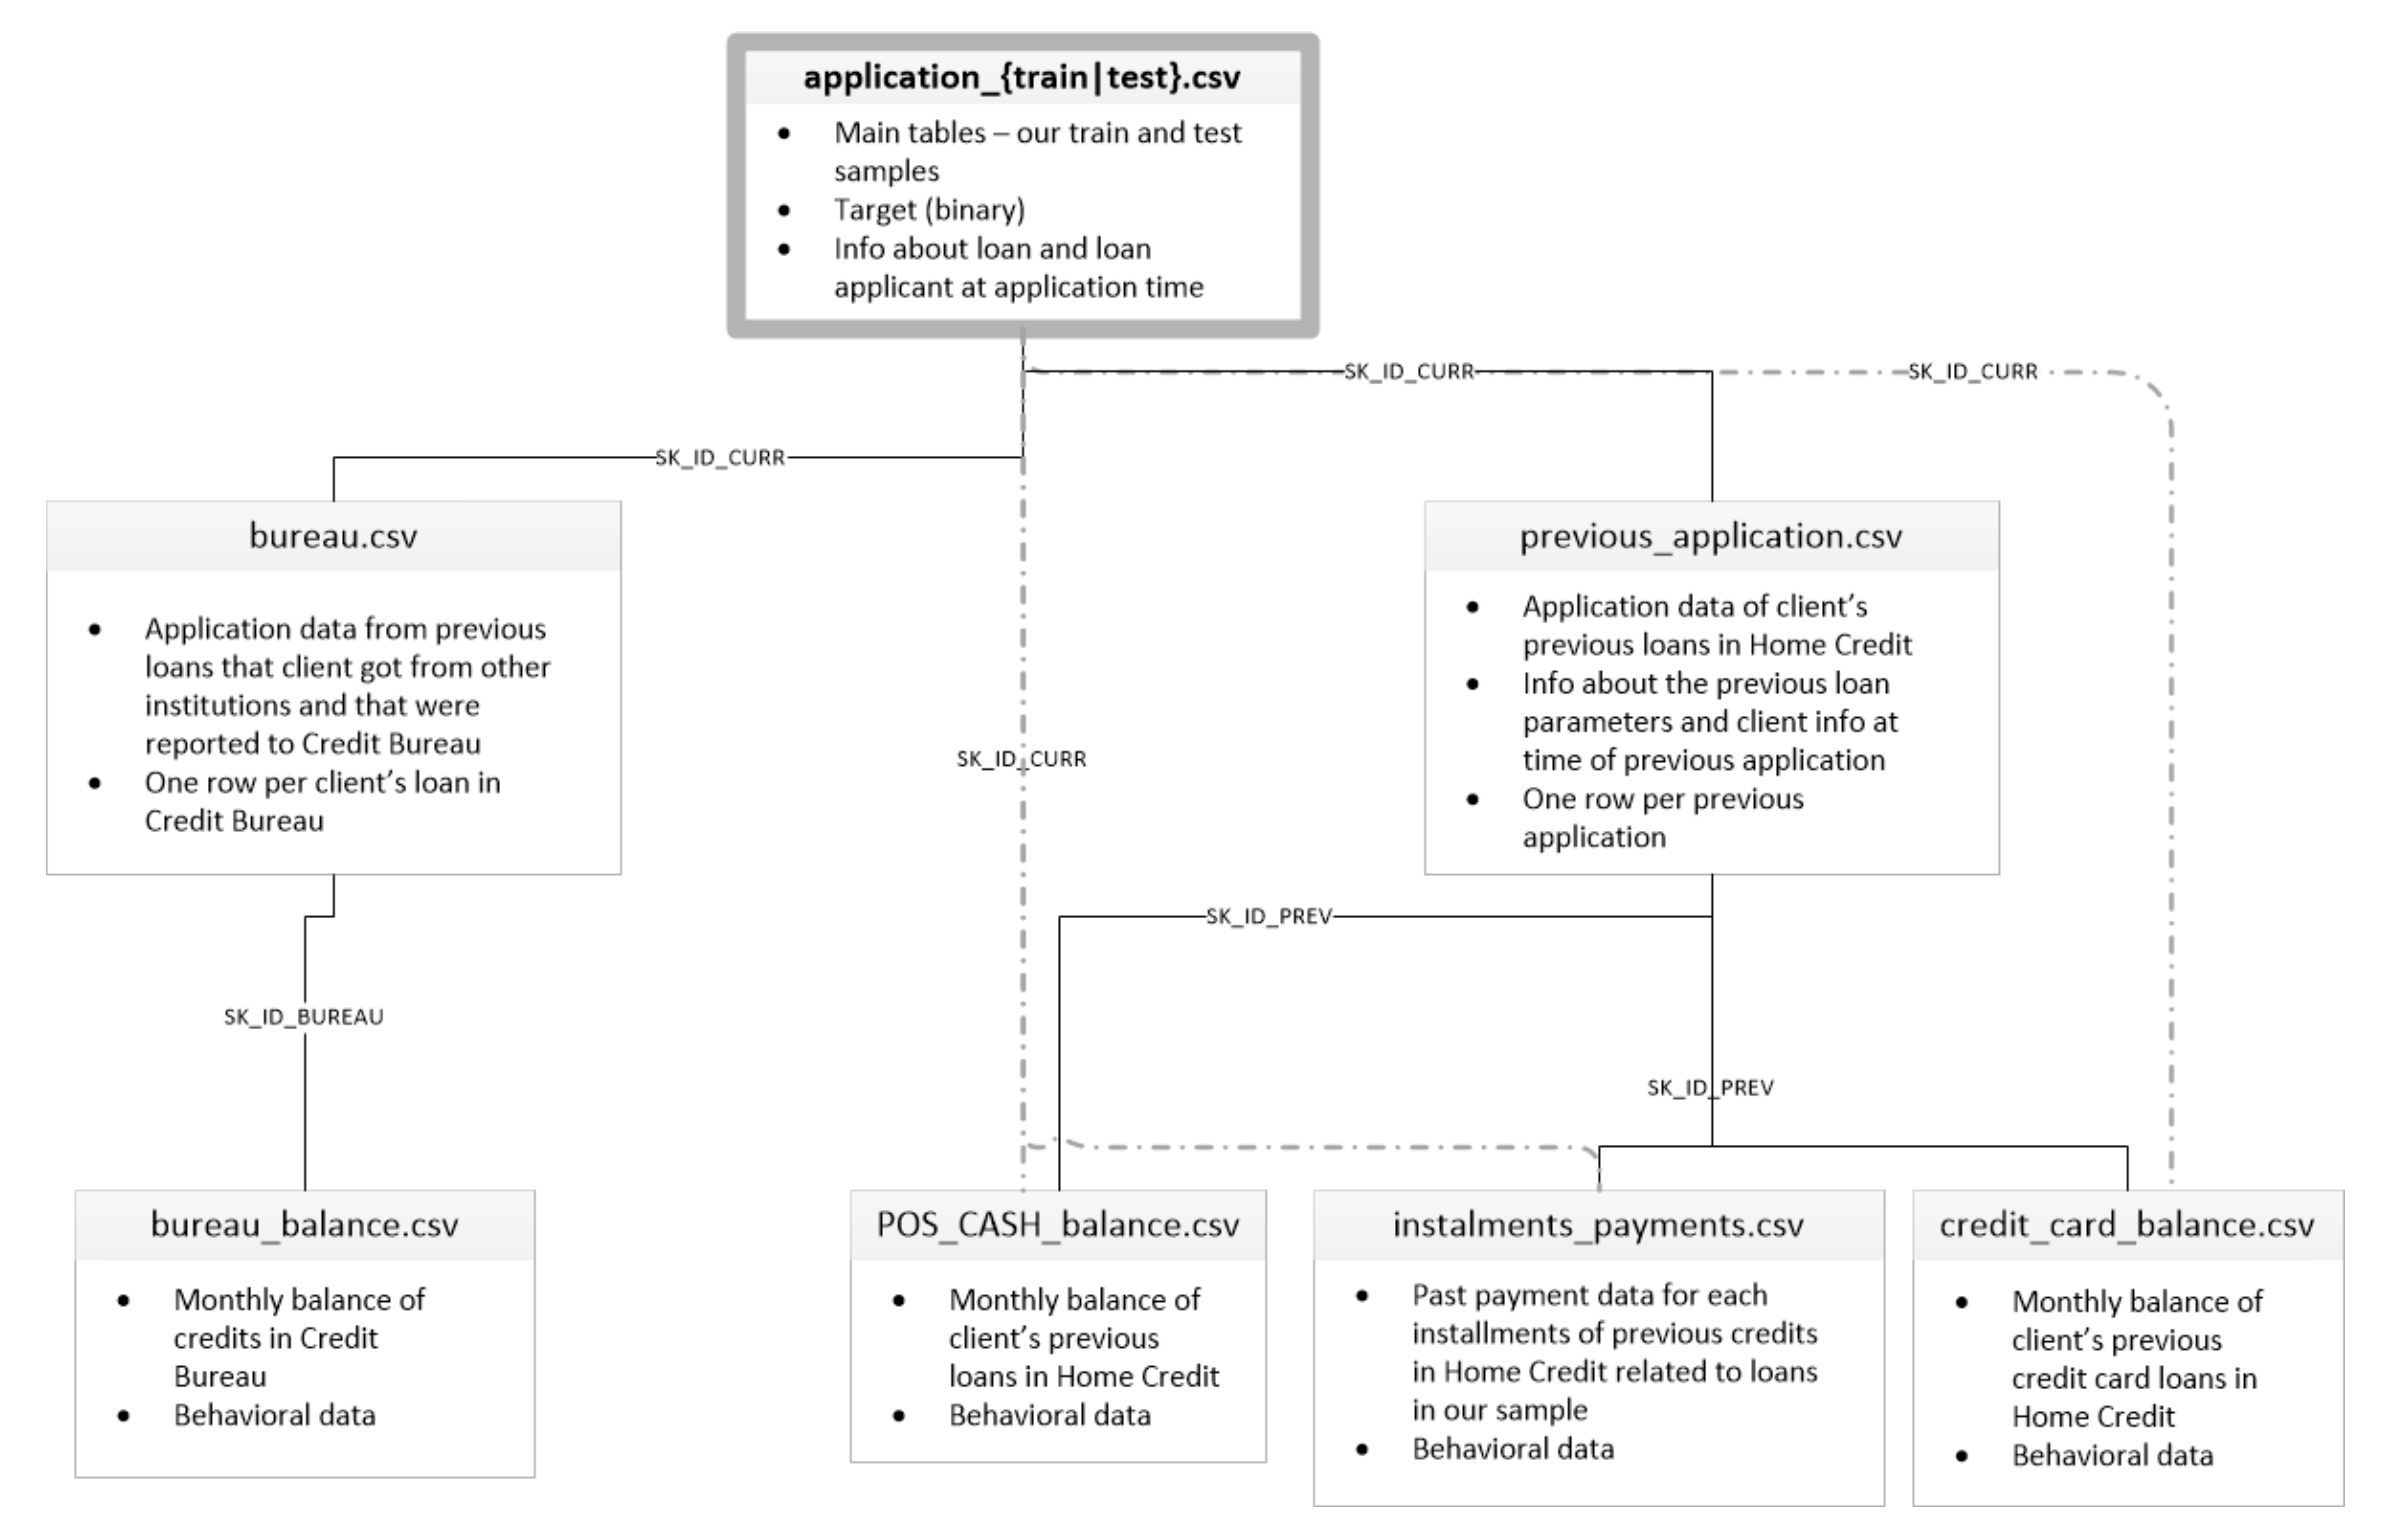

## DataFrame "application_test"

- This is the main table, broken into two files for Train (with TARGET) and Test
(without TARGET).
- Static data for all applications. One row represents one loan in our data
sample.

In [3]:
df_application_test = pd.read_csv(
    "/Users/drkazimieras/Turing College/Home credit default risk/data files/application_test.csv"
)

<IPython.core.display.Javascript object>

In [4]:
df_application_test.shape

(48744, 121)

<IPython.core.display.Javascript object>

In [5]:
df_application_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

<IPython.core.display.Javascript object>

In [6]:
df_feature_names = df_application_test.columns
# "list" as a work around for truncation
print(list(df_feature_names))

['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG

<IPython.core.display.Javascript object>

In [7]:
df = df_application_test

num_of_rows = len(df)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / num_of_rows) * 100

missing_percentage_df = pd.DataFrame(
    {
        "Missing values (count)": missing_values,
        "Missing values (%)": missing_percentage,
    }
).sort_values("Missing values (%)", ascending=False)

missing_percentage_df = missing_percentage_df[
    missing_percentage_df["Missing values (%)"] > 0
]

missing_percentage_df

Missing values (count)  Missing values (%)
COMMONAREA_AVG                             33495           68.716150
COMMONAREA_MODE                            33495           68.716150
COMMONAREA_MEDI                            33495           68.716150
NONLIVINGAPARTMENTS_AVG                    33347           68.412523
NONLIVINGAPARTMENTS_MODE                   33347           68.412523
...                                          ...                 ...
OBS_30_CNT_SOCIAL_CIRCLE                      29            0.059495
OBS_60_CNT_SOCIAL_CIRCLE                      29            0.059495
DEF_60_CNT_SOCIAL_CIRCLE                      29            0.059495
AMT_ANNUITY                                   24            0.049237
EXT_SOURCE_2                                   8            0.016412

[64 rows x 2 columns]

<IPython.core.display.Javascript object>

## DataFrame "application_train"

- This is the main table, broken into two files for Train (with TARGET) and Test
(without TARGET).
- Static data for all applications. One row represents one loan in our data
sample.

In [8]:
df_application_train = pd.read_csv(
    "/Users/drkazimieras/Turing College/Home credit default risk/data files/application_train.csv"
)

<IPython.core.display.Javascript object>

In [9]:
df_application_train.shape

(307511, 122)

<IPython.core.display.Javascript object>

In [10]:
df_application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

<IPython.core.display.Javascript object>

In [11]:
unique_val = pd.unique(df_application_train["TARGET"])
unique_val

array([1, 0])

<IPython.core.display.Javascript object>

In [12]:
df_feature_names = df_application_train.columns
print(list(df_feature_names))

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

<IPython.core.display.Javascript object>

In [13]:
df = df_application_train

num_of_rows = len(df)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / num_of_rows) * 100

missing_percentage_df = pd.DataFrame(
    {
        "Missing values (count)": missing_values,
        "Missing values (%)": missing_percentage,
    }
).sort_values("Missing values (%)", ascending=False)

missing_percentage_df = missing_percentage_df[
    missing_percentage_df["Missing values (%)"] > 0
]

missing_percentage_df

Missing values (count)  Missing values (%)
COMMONAREA_MEDI                           214865           69.872297
COMMONAREA_AVG                            214865           69.872297
COMMONAREA_MODE                           214865           69.872297
NONLIVINGAPARTMENTS_MODE                  213514           69.432963
NONLIVINGAPARTMENTS_AVG                   213514           69.432963
...                                          ...                 ...
EXT_SOURCE_2                                 660            0.214626
AMT_GOODS_PRICE                              278            0.090403
AMT_ANNUITY                                   12            0.003902
CNT_FAM_MEMBERS                                2            0.000650
DAYS_LAST_PHONE_CHANGE                         1            0.000325

[67 rows x 2 columns]

<IPython.core.display.Javascript object>

## DataFrame "bureau_balance"

- Monthly balances of previous credits in Credit Bureau.
- This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

In [14]:
df_bureau_balance = pd.read_csv(
    "/Users/drkazimieras/Turing College/Home credit default risk/data files/bureau_balance.csv"
)

<IPython.core.display.Javascript object>

In [15]:
df_bureau_balance.shape

(27299925, 3)

<IPython.core.display.Javascript object>

In [16]:
df_bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

<IPython.core.display.Javascript object>

In [17]:
df = df_bureau_balance

num_of_rows = len(df)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / num_of_rows) * 100

missing_percentage_df = pd.DataFrame(
    {
        "Missing values (count)": missing_values,
        "Missing values (%)": missing_percentage,
    }
).sort_values("Missing values (%)", ascending=False)

missing_percentage_df = missing_percentage_df[
    missing_percentage_df["Missing values (%)"] > 0
]

missing_percentage_df

Empty DataFrame
Columns: [Missing values (count), Missing values (%)]
Index: []

<IPython.core.display.Javascript object>

## DataFrame "bureau"

- All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
- For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

In [18]:
df_bureau = pd.read_csv(
    "/Users/drkazimieras/Turing College/Home credit default risk/data files/bureau.csv"
)

<IPython.core.display.Javascript object>

In [19]:
df_bureau.shape

(1716428, 17)

<IPython.core.display.Javascript object>

In [20]:
df_bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

<IPython.core.display.Javascript object>

In [21]:
df_feature_names = df_bureau.columns
# "list" as a work around for truncation
print(list(df_feature_names))

['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']


<IPython.core.display.Javascript object>

In [22]:
df = df_bureau

num_of_rows = len(df)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / num_of_rows) * 100

missing_percentage_df = pd.DataFrame(
    {
        "Missing values (count)": missing_values,
        "Missing values (%)": missing_percentage,
    }
).sort_values("Missing values (%)", ascending=False)

missing_percentage_df = missing_percentage_df[
    missing_percentage_df["Missing values (%)"] > 0
]

missing_percentage_df

Missing values (count)  Missing values (%)
AMT_ANNUITY                            1226791           71.473490
AMT_CREDIT_MAX_OVERDUE                 1124488           65.513264
DAYS_ENDDATE_FACT                       633653           36.916958
AMT_CREDIT_SUM_LIMIT                    591780           34.477415
AMT_CREDIT_SUM_DEBT                     257669           15.011932
DAYS_CREDIT_ENDDATE                     105553            6.149573
AMT_CREDIT_SUM                              13            0.000757

<IPython.core.display.Javascript object>

## DataFrame "credit_card_balance"

- Monthly balance snapshots of previous credit cards that the applicant has with
Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

In [23]:
df_credit_card_balance = pd.read_csv(
    "/Users/drkazimieras/Turing College/Home credit default risk/data files/credit_card_balance.csv"
)

<IPython.core.display.Javascript object>

In [24]:
df_credit_card_balance.shape

(3840312, 23)

<IPython.core.display.Javascript object>

In [25]:
df_credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

<IPython.core.display.Javascript object>

In [26]:
df_feature_names = df_credit_card_balance.columns
# "list" as a work around for truncation in the middle
print(list(df_feature_names))

['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF']


<IPython.core.display.Javascript object>

In [27]:
df = df_credit_card_balance

num_of_rows = len(df)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / num_of_rows) * 100

missing_percentage_df = pd.DataFrame(
    {
        "Missing values (count)": missing_values,
        "Missing values (%)": missing_percentage,
    }
).sort_values("Missing values (%)", ascending=False)

missing_percentage_df = missing_percentage_df[
    missing_percentage_df["Missing values (%)"] > 0
]

missing_percentage_df

Missing values (count)  Missing values (%)
AMT_PAYMENT_CURRENT                         767988           19.998063
AMT_DRAWINGS_ATM_CURRENT                    749816           19.524872
CNT_DRAWINGS_POS_CURRENT                    749816           19.524872
AMT_DRAWINGS_OTHER_CURRENT                  749816           19.524872
AMT_DRAWINGS_POS_CURRENT                    749816           19.524872
CNT_DRAWINGS_OTHER_CURRENT                  749816           19.524872
CNT_DRAWINGS_ATM_CURRENT                    749816           19.524872
CNT_INSTALMENT_MATURE_CUM                   305236            7.948208
AMT_INST_MIN_REGULARITY                     305236            7.948208

<IPython.core.display.Javascript object>

## DataFrame "HomeCredit_columns_description"

- This file contains descriptions for the columns in the various data files.

In [28]:
df_HomeCredit_columns_description = pd.read_csv(
    "/Users/drkazimieras/Turing College/Home credit default risk/data files/HomeCredit_columns_description.csv",
    encoding="ISO-8859-1",
)

<IPython.core.display.Javascript object>

Note that encoding of this .csv file is different from the others. Instead of utf-8 it is ISO-8859-1.

In [29]:
df_HomeCredit_columns_description.shape

(219, 5)

<IPython.core.display.Javascript object>

In [30]:
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_row", 219)
df_HomeCredit_columns_description.head(219)

Unnamed: 0                         Table                           Row  \
0             1  application_{train|test}.csv                    SK_ID_CURR   
1             2  application_{train|test}.csv                        TARGET   
2             5  application_{train|test}.csv            NAME_CONTRACT_TYPE   
3             6  application_{train|test}.csv                   CODE_GENDER   
4             7  application_{train|test}.csv                  FLAG_OWN_CAR   
5             8  application_{train|test}.csv               FLAG_OWN_REALTY   
6             9  application_{train|test}.csv                  CNT_CHILDREN   
7            10  application_{train|test}.csv              AMT_INCOME_TOTAL   
8            11  application_{train|test}.csv                    AMT_CREDIT   
9            12  application_{train|test}.csv                   AMT_ANNUITY   
10           13  application_{train|test}.csv               AMT_GOODS_PRICE   
11           14  application_{train|test}.csv               NAME_TYPE_SUITE   
12           15  application_{train|test}.csv              NAME_INCOME_TYPE   
13           16  application_{train|test}.csv           NAME_EDUCATION_TYPE   
14           17  application_{train|test}.csv            NAME_FAMILY_STATUS   
15           18  application_{train|test}.csv             NAME_HOUSING_TYPE   
16           19  application_{train|test}.csv    REGION_POPULATION_RELATIVE   
17           20  application_{train|test}.csv                    DAYS_BIRTH   
18           21  application_{train|test}.csv                 DAYS_EMPLOYED   
19           22  application_{train|test}.csv             DAYS_REGISTRATION   
20           23  application_{train|test}.csv               DAYS_ID_PUBLISH   
21           24  application_{train|test}.csv                   OWN_CAR_AGE   
22           25  application_{train|test}.csv                    FLAG_MOBIL   
23           26  application_{train|test}.csv                FLAG_EMP_PHONE   
24           27  application_{train|test}.csv               FLAG_WORK_PHONE   
25           28  application_{train|test}.csv              FLAG_CONT_MOBILE   
26           29  application_{train|test}.csv                    FLAG_PHONE   
27           30  application_{train|test}.csv                    FLAG_EMAIL   
28           31  application_{train|test}.csv               OCCUPATION_TYPE   
29           32  application_{train|test}.csv               CNT_FAM_MEMBERS   
30           33  application_{train|test}.csv          REGION_RATING_CLIENT   
31           34  application_{train|test}.csv   REGION_RATING_CLIENT_W_CITY   
32           35  application_{train|test}.csv    WEEKDAY_APPR_PROCESS_START   
33           36  application_{train|test}.csv       HOUR_APPR_PROCESS_START   
34           37  application_{train|test}.csv    REG_REGION_NOT_LIVE_REGION   
35           38  application_{train|test}.csv    REG_REGION_NOT_WORK_REGION   
36           39  application_{train|test}.csv   LIVE_REGION_NOT_WORK_REGION   
37           40  application_{train|test}.csv        REG_CITY_NOT_LIVE_CITY   
38           41  application_{train|test}.csv        REG_CITY_NOT_WORK_CITY   
39           42  application_{train|test}.csv       LIVE_CITY_NOT_WORK_CITY   
40           43  application_{train|test}.csv             ORGANIZATION_TYPE   
41           44  application_{train|test}.csv                  EXT_SOURCE_1   
42           45  application_{train|test}.csv                  EXT_SOURCE_2   
43           46  application_{train|test}.csv                  EXT_SOURCE_3   
44           47  application_{train|test}.csv                APARTMENTS_AVG   
45           48  application_{train|test}.csv              BASEMENTAREA_AVG   
46           49  application_{train|test}.csv   YEARS_BEGINEXPLUATATION_AVG   
47           50  application_{train|test}.csv               YEARS_BUILD_AVG   
48           51  application_{train|test}.csv                COMMONAREA_AVG   
49           52  application_{train|test}.csv          

<IPython.core.display.Javascript object>

## DataFrame "installments_payments"

- Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
- There is a) one row for every payment that was made plus b) one row each for missed payment.
- One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

In [31]:
df_installments_payments = pd.read_csv(
    "/Users/drkazimieras/Turing College/Home credit default risk/data files/installments_payments.csv"
)

<IPython.core.display.Javascript object>

In [32]:
df_installments_payments.shape

(13605401, 8)

<IPython.core.display.Javascript object>

In [33]:
df_installments_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

<IPython.core.display.Javascript object>

In [34]:
df_feature_names = df_installments_payments.columns
# "list" as a work around for truncation
print(list(df_feature_names))

['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']


<IPython.core.display.Javascript object>

In [35]:
df = df_installments_payments

num_of_rows = len(df)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / num_of_rows) * 100

missing_percentage_df = pd.DataFrame(
    {
        "Missing values (count)": missing_values,
        "Missing values (%)": missing_percentage,
    }
).sort_values("Missing values (%)", ascending=False)

missing_percentage_df = missing_percentage_df[
    missing_percentage_df["Missing values (%)"] > 0
]

missing_percentage_df

Missing values (count)  Missing values (%)
DAYS_ENTRY_PAYMENT                    2905            0.021352
AMT_PAYMENT                           2905            0.021352

<IPython.core.display.Javascript object>

## DataFrame "POS_CACH_balance"

- Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

In [36]:
df_POS_CASH_balance = pd.read_csv(
    "/Users/drkazimieras/Turing College/Home credit default risk/data files/POS_CASH_balance.csv"
)

<IPython.core.display.Javascript object>

In [37]:
df_POS_CASH_balance.shape

(10001358, 8)

<IPython.core.display.Javascript object>

In [38]:
df_POS_CASH_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

<IPython.core.display.Javascript object>

In [39]:
df = df_POS_CASH_balance

num_of_rows = len(df)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / num_of_rows) * 100

missing_percentage_df = pd.DataFrame(
    {
        "Missing values (count)": missing_values,
        "Missing values (%)": missing_percentage,
    }
).sort_values("Missing values (%)", ascending=False)

missing_percentage_df = missing_percentage_df[
    missing_percentage_df["Missing values (%)"] > 0
]

missing_percentage_df

Missing values (count)  Missing values (%)
CNT_INSTALMENT_FUTURE                   26087            0.260835
CNT_INSTALMENT                          26071            0.260675

<IPython.core.display.Javascript object>

## DataFrame "previous_application"

- All previous applications for Home Credit loans of clients who have loans in our
sample.
- There is one row for each previous application related to loans in our data
sample.

In [40]:
df_previous_application = pd.read_csv(
    "/Users/drkazimieras/Turing College/Home credit default risk/data files/previous_application.csv"
)

<IPython.core.display.Javascript object>

In [41]:
df_previous_application.shape

(1670214, 37)

<IPython.core.display.Javascript object>

In [42]:
df_previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

<IPython.core.display.Javascript object>

In [43]:
df_feature_names = df_previous_application.columns
# "list" as a work around for truncation
print(list(df_feature_names))

['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


<IPython.core.display.Javascript object>

In [44]:
df = df_previous_application

num_of_rows = len(df)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / num_of_rows) * 100

missing_percentage_df = pd.DataFrame(
    {
        "Missing values (count)": missing_values,
        "Missing values (%)": missing_percentage,
    }
).sort_values("Missing values (%)", ascending=False)

missing_percentage_df = missing_percentage_df[
    missing_percentage_df["Missing values (%)"] > 0
]

missing_percentage_df

Missing values (count)  Missing values (%)
RATE_INTEREST_PRIVILEGED                  1664263           99.643698
RATE_INTEREST_PRIMARY                     1664263           99.643698
AMT_DOWN_PAYMENT                           895844           53.636480
RATE_DOWN_PAYMENT                          895844           53.636480
NAME_TYPE_SUITE                            820405           49.119754
NFLAG_INSURED_ON_APPROVAL                  673065           40.298129
DAYS_TERMINATION                           673065           40.298129
DAYS_LAST_DUE                              673065           40.298129
DAYS_LAST_DUE_1ST_VERSION                  673065           40.298129
DAYS_FIRST_DUE                             673065           40.298129
DAYS_FIRST_DRAWING                         673065           40.298129
AMT_GOODS_PRICE                            385515           23.081773
AMT_ANNUITY                                372235           22.286665
CNT_PAYMENT                                372230           22.286366
PRODUCT_COMBINATION                           346            0.020716
AMT_CREDIT                                      1            0.000060

<IPython.core.display.Javascript object>

## DataFrame "sample_submission"

In [45]:
df_sample_submission = pd.read_csv(
    "/Users/drkazimieras/Turing College/Home credit default risk/data files/sample_submission.csv"
)

<IPython.core.display.Javascript object>

In [46]:
df_sample_submission.shape

(48744, 2)

<IPython.core.display.Javascript object>

In [47]:
df_sample_submission.head()

SK_ID_CURR  TARGET
0      100001     0.5
1      100005     0.5
2      100013     0.5
3      100028     0.5
4      100038     0.5

<IPython.core.display.Javascript object>

# Conculsions

There are 215 (in 8 .csv files) potentially useful features including detailed infomation about clients' living conditions, employment, family, previous applications, financial history.